# Angel Racini Meza 

Importando las librerias necesarias para desarrollar todos los puntos

In [518]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import tree
import warnings
from sklearn.ensemble import RandomForestRegressor
import graphviz 
from graphviz import Source
import pydotplus
warnings.filterwarnings('ignore')
%matplotlib inline

Todas los datasets de ISLR se encuentran libre en formato en CSV, en el siguiente enlace: [ISLR](https://github.com/emredjan/ISL-python)

## Punto 4.7 

<Font color = 'blue'>This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.<Font>

### Ejercicio 10

In [306]:
#Importando los datasets
df = pd.read_csv("datasets\Weekly.csv")
df = df.iloc[:,1:]

<Font color = 'blue'> A.)
    Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns? <Font>

In [307]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

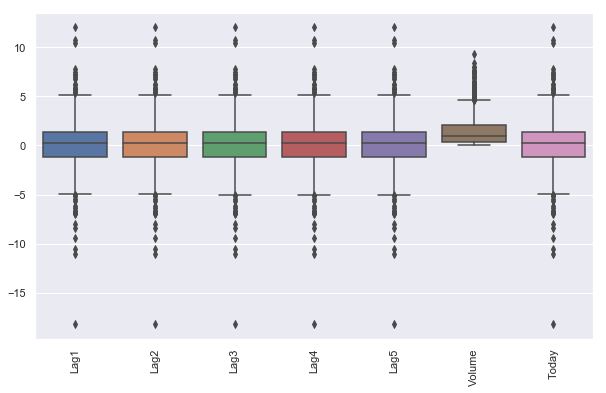

In [296]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df.iloc[:,1:])
plt.xticks(rotation=90)

Podemos notar que los lags se mantiene en la misma media, además se presentan algunos outlayers. Los rangos intercuartiles parecen
parejos lo que indican que los datose podrían distribuir normalmente. 

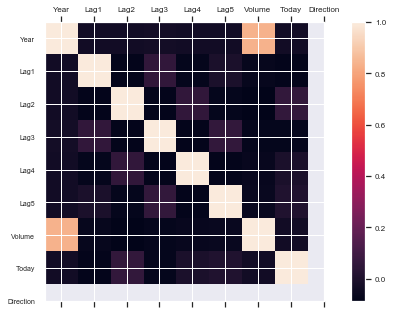

In [298]:
f = plt.figure(figsize=(10,5))
plt.matshow(df.corr(), fignum=f.number)
plt.yticks(range(df.shape[1]), df.columns, fontsize=7)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)

Se puede notar una correlacion bastante alta entre el año y el volumen. 

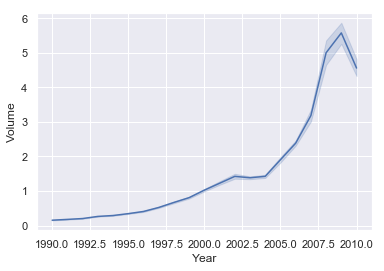

In [299]:
sb.lineplot(x="Year", y="Volume",data=df)

Esa alta correlacion la podemos notar porque a medida que aumenta el año aumenta el volumen de acciones negociadas. A continuación se hace una prueba para ver que features del cojunto de datos son los que mas afectan o mueven la variable respuesta. 

<Font color = 'blue'> B. Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?<Font>

In [300]:
#Partimos el conjunto de datos entre X (predictoras) y Y(variable respuesta) y obtenemos 
#los valores P, con respecto a cada variable

X = df.iloc[:,1:len(df.columns)- 1]
Y = df.iloc[:,-1]
Bests = SelectKBest(score_func = f_classif , k=len(X.columns)).fit(X, Y)
Best = dict(zip(X.columns, Bests.pvalues_))
Best

{'Lag1': 0.099093927223568,
 'Lag2': 0.016421989799936025,
 'Lag3': 0.4500368828059069,
 'Lag4': 0.4981364874454157,
 'Lag5': 0.5492303253689037,
 'Volume': 0.5530420565252107,
 'Today': 1.118596048944062e-174}

Podemos observar que el menor valor p está asociado a la variable Today, Al parecer la variable todaday parece bastante significativa para predecir la variable respuesta. El valor-p de las variables Lag1 y Lag2 es bajo, pero no lo suficiente para decir que es muy significativa.

<Font color = 'blue'> C. Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.<Font>

In [301]:
#Implementamos una regresion logistica sin particionar los datos y entrenamos sobre todo el conjunto de datos.

X = df.iloc[:,1:len(df.columns)-1]
Y = df.iloc[:,-1]
clf = LogisticRegression().fit(X,Y)
y_pred = clf.predict(X)

print("Matriz de confusion \n")
print(confusion_matrix(Y, y_pred))

Matriz de confusion 

[[481   3]
 [  0 605]]


Al entrenar y hacer la predicción sobre todo el conjunto de datos obtenemos que la regresión fue capaz de clasificar todos los down como down pero falló al clasificar 3 que eran UP, y los clasificó como Down.

<Font color = 'blue'> D. Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).<Font>

Ahora vamos a entrenar el modelo solo con los datos correspondientes entre los años 1990 a 2008 solo con la variable lag2 como el unico predictor. Y se validará el modelo con los datos del 2009 y 2010

In [302]:
X_Train = df[df['Year'] <= 2008]
X_Train = X_Train.loc[:,"Lag2"]

X_Test = df[df['Year'] > 2008]
X_Test = X_Test.loc[:,'Lag2']

Y_Train = df[df['Year'] <= 2008]
Y_Train = Y_Train.loc[:,'Direction']

Y_Test = df[df['Year'] > 2008]
Y_Test = Y_Test.loc[:,'Direction']

X_Train = np.array(X_Train).reshape(-1,1)
X_Test = np.array(X_Test).reshape(-1,1)

In [305]:
clf = LogisticRegression().fit(X_Train ,Y_Train)
y_pred = clf.predict(X_Test)
print("Matriz de confusion \n")
print(confusion_matrix(Y_Test, y_pred))

Matriz de confusion 

[[ 9 34]
 [ 5 56]]


Al entrenar el modelo con una regresión logistica y solamente la variable predictiva Lag2, se obtiene que el modelo no es muy bueno prediciendo la variable respuesta, se obtiene que el modelo es muy bueno clasificando la clase down como down pero no es capaz de clasificar muy bien las up como up. 

<Font color = 'blue'> E. Repeat (d) using LDA.<Font>

Implementando el modelo usando **LDA**

In [130]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_Train,Y_Train)
y_pred = clf.predict(X_Test)
print(confusion_matrix(Y_Test, y_pred))

[[ 9 34]
 [ 5 56]]


Con el **LDA** obtenemos un resultado similar a la regresion logistica. 

<Font color = 'blue'> F. Repeat (d) using QDA.<Font>

Implementando el modelo usando **QDA**

In [131]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_Train,Y_Train)
y_pred = clf.predict(X_Test)
print(confusion_matrix(Y_Test, y_pred))

[[ 0 43]
 [ 0 61]]


Con el **QDA** obtenemos que el modelo es capaz de predecir con exactitud todos los Down como Down pero no es capaz de predecir ningun UP como Up.

<Font color = 'blue'> G. Repeat (d) using KNN with k= 1.<Font>

#### Implementando el modelo usando KNN

Para la implementacion de KNN se usará un solo vecino

In [133]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X_Train, Y_Train)
y_pred = clf.predict(X_Test)
print(confusion_matrix(Y_Test, y_pred))

[[21 22]
 [31 30]]


Podemos observar que el algoritmo no es del todo bueno, al parecer con un solo vecino tiene una precisión de alrededor del 50% clasificando cada clase. 

<Font color = 'blue'> H. Which of these methods appears to provide the best results on
this data?.<Font>

Se podría decir entonces que con la variable lag2 los modelos son buenos prediciendo los down pero no los up, si se buscará una precision del 100% prediciendo solos los down, la mejor opcion sería el QDA. 

<Font color = 'blue'> I. Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
K in the KNN classifier.<Font>

Teniendo en cuenta que la variable respuesta se ve mejor descrita por 'Lag2','Lag3', 'Lag4, se tomaran estas variables para estimar la predicción de la direccion.


In [308]:
X = df.iloc[:,1:len(df.columns)- 1]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

In [313]:
print("REGRESION LOGISTICA \n")
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

REGRESION LOGISTICA 

              precision    recall  f1-score   support

        Down       0.98      0.95      0.96       375
          Up       0.96      0.99      0.97       497

    accuracy                           0.97       872
   macro avg       0.97      0.97      0.97       872
weighted avg       0.97      0.97      0.97       872



In [345]:
print("QDA \n")
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

QDA 

              precision    recall  f1-score   support

        Down       0.82      0.89      0.86       375
          Up       0.91      0.86      0.88       497

    accuracy                           0.87       872
   macro avg       0.87      0.87      0.87       872
weighted avg       0.87      0.87      0.87       872



In [344]:
print("LDA \n")
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

LDA 

              precision    recall  f1-score   support

        Down       0.87      0.90      0.89       375
          Up       0.93      0.90      0.91       497

    accuracy                           0.90       872
   macro avg       0.90      0.90      0.90       872
weighted avg       0.90      0.90      0.90       872



In [343]:
print("LDA \n")
clf = neighbors.KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

LDA 

              precision    recall  f1-score   support

        Down       0.82      0.88      0.85       375
          Up       0.90      0.86      0.88       497

    accuracy                           0.87       872
   macro avg       0.86      0.87      0.87       872
weighted avg       0.87      0.87      0.87       872



Podemos concluir que para el modelo con 3 predictoras, el modelo de **Regresión Logistica** resulta ser el mejor. Con una precisión para clasificar los **Down** de: **0.96** y los **Up** de: **0.97**

### Ejercicio 11

<Font color = 'blue'>In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.<Font>

<Font color = 'blue'>A. Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.<Font>


In [346]:
#Importando los datasets
df = pd.read_csv("datasets\Auto.csv")

#creando la variable binaria.
media_mpg = df['mpg'].mean()
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x > media_mpg else 0)
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0


<Font color = 'blue'>b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.<Font>


Viendo la relacion de las **variables** con respecto a **mpg01**

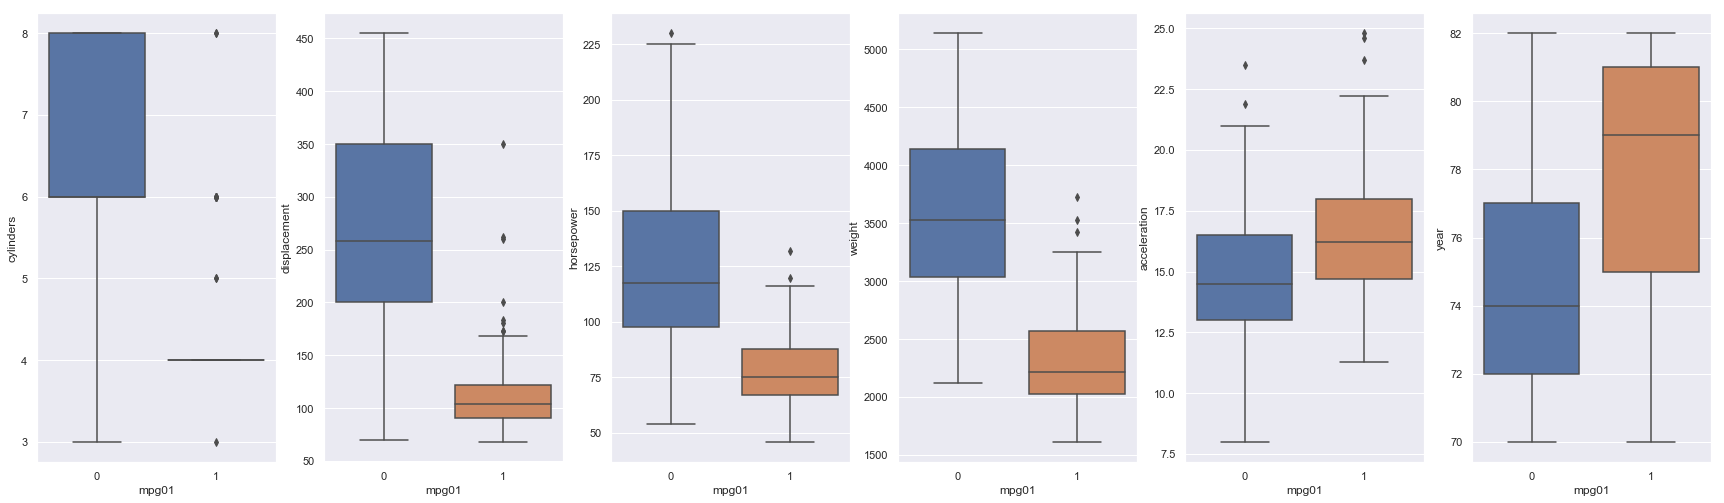

In [348]:
fig, axs = plt.subplots(1,6)
sb.set(rc={'figure.figsize':(20,10)})
sb.set(rc={'figure.figsize':(30,8.27)})
sb.boxplot(x = df['mpg01'], y=df['cylinders'],
                    data=df, ax=axs[0])
sb.boxplot(x = df['mpg01'], y=df['displacement'],
                    data=df, ax=axs[1])
sb.boxplot(x = df['mpg01'], y=df['horsepower'],
                    data=df,ax=axs[2])
sb.boxplot(x = df['mpg01'], y=df['weight'],
                    data=df, ax=axs[3])
sb.boxplot(x = df['mpg01'], y=df['acceleration'],
                    data=df, ax=axs[4])
sb.boxplot(x = df['mpg01'], y=df['year'],
                    data=df, ax=axs[5])

De los boxplot podemos notar:
* Para la variable cylinders, displacements, horsepower, weight y acceleration. los valores de mpg01 de 1 representan valores mas bajos de las variables, mientras que entre mayor es el año, se podría decir que mas tiende a 1 el mpg01. 

* Las variables están en diferentes escalas.

* Se puede ver una relación muy lineal entre las variables predictoras y el mpg01


<Font color = 'blue'>(c) Split the data into a training set and a test set.<Font>


**Escalando los datos y particionandolos**

In [350]:
#Se eliminan la variable name, ya que no nos interesa para el estudio. 
X = df.loc[:,['cylinders','displacement','horsepower','weight','acceleration','year']]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head(4)
Y = df.loc[:,"mpg01"]

Obtenemos el valor-p de clasificación, para ver que variables son las que mas mueven la variable respuesta.

In [351]:
Bests = SelectKBest(score_func = f_classif , k=len(X.columns)).fit(X, Y)
Best = dict(zip(X.columns, Bests.pvalues_))
Best

{'cylinders': 1.902355955966883e-69,
 'displacement': 6.040716878277069e-69,
 'horsepower': 5.526578203881959e-49,
 'weight': 5.984542333828794e-71,
 'acceleration': 2.741501294022166e-11,
 'year': 1.122664931370214e-20}

Podemos observar que todas las variables son buenas prediciendo el target, pero con diferencia cylinders, displacements, horsepower y weight son las variables que mejor explican el target

In [352]:
#Diviendo el conjunto de datos en entrenamiento y validacion
X = X.loc[:,['cylinders', 'displacement', 'horsepower', 'weight']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

<Font color = 'blue'>(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?<Font>


#### Implementado el LDA

In [358]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("MSE %0.2f" % mean_squared_error(y_test, y_pred))

MSE 0.14


<Font color = 'blue'>(d) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?<Font>

#### Implementando el QDA

In [363]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("TEST MSE %0.4f" % mean_squared_error(y_test, y_pred))

TEST MSE 0.0943


<Font color = 'blue'>(d) Perform Logistic Regression on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?<Font>

#### Implementando la regresion Logistica

In [364]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("TEST MSE %0.4f" % mean_squared_error(y_test, y_pred))

TEST MSE 0.1164


<Font color = 'blue'>(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?<Font>

#### Implementando KNN

In [381]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("TEST MSE %0.4f" % mean_squared_error(y_test, y_pred))
print("El mejor valor probado para K fue: 2 Neighbors")

TEST MSE 0.1164
El mejor valor probado para K fue: 2 Neighbors


### Ejercicio 12

<Font color = 'blue'><Font>
(a) Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.
Hint: Recall that x^a raises x to the power a. Use the print()
function to output the result.

In [385]:
def Power():
    return 2 ** 3

Power()

8

<Font color = 'blue'>B. Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x^a. You can
do this by beginning your function with the line
    * Power2 =function (x,a)
    
You should be able to call your function by entering, for instance,
    * Power2 (3,8)
on the command line. 
    
This should output the value of 38, namely,
6, 561.<Font>

In [386]:
def Power2(a, b):
    return a ** b

Power2(3,8)

6561

<Font color = 'blue'>C.) Using the Power2() function that you just wrote, compute 103,
817, and 1313.<Font>

In [389]:
print(Power2(10,3))
print(Power2(8,17))
print(Power2(131,3))

1000
2251799813685248
2248091


<Font color = 'blue'>(d) Now create a new function, Power3(), that actually returns the
result x^a as an R object, rather than simply printing it to the
screen. That is, if you store the value x^a in an object called
result within your function, then you can simply return() this
return()
result, using the following line:
4.7 Exercises 173
return (result )
The line above should be the last line in your function, before
the } symbol.<Font>

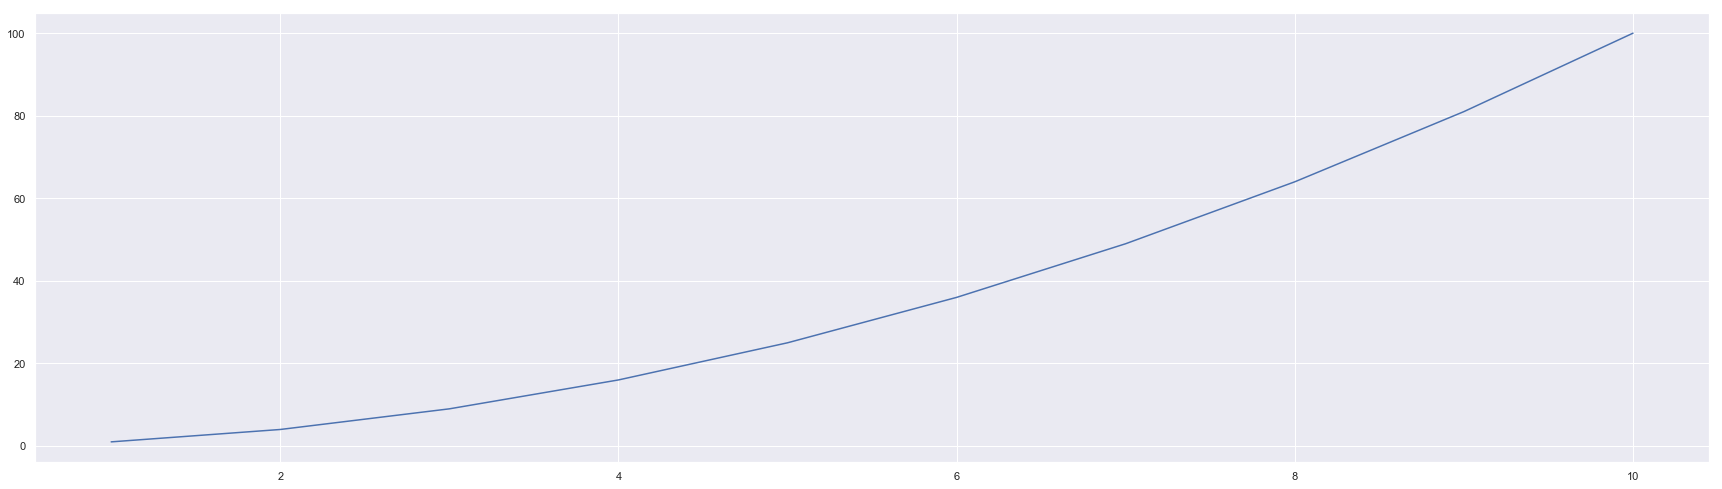

In [391]:
def Power3(a, b):
    result = a ** b
    return result

x = [1,2,3,4,5,6,7,8,9,10] 
y = [Power3(i,2) for i in [1,2,3,4,5,6,7,8,9,10]]
plt.plot(x,y)

<Font color = 'blue'>e.) Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using log=‘‘x’’, log=‘‘y’’, or log=‘‘xy’’ as arguments to
the plot() function.<Font>

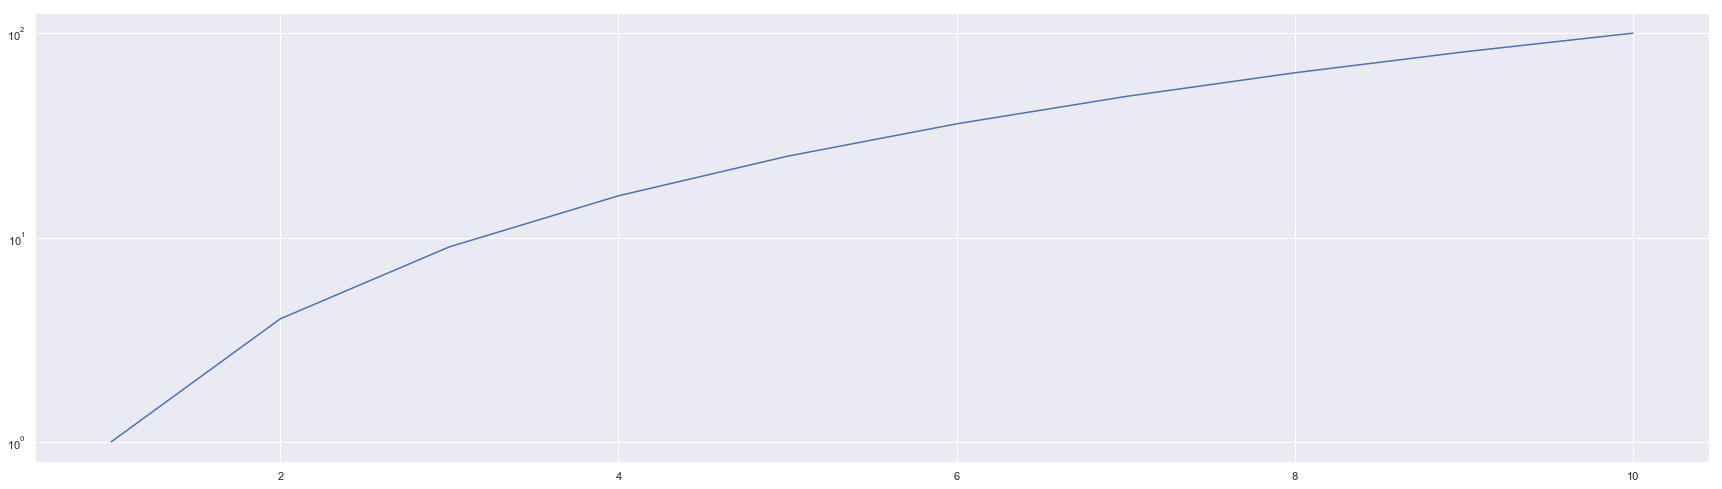

In [393]:
x = [1,2,3,4,5,6,7,8,9,10] 
y = [Power3(i,2) for i in [1,2,3,4,5,6,7,8,9,10]]
plt.plot(x,y)
plt.yscale("log")

<Font color = 'blue'>(f) Create a function, PlotPower(), that allows you to create a plot
of x against x^a for a fixed a and for a range of values of x. For instance, if you call PlotPower (1:10 ,3) then a plot should be created with an x-axis taking on values 1, 2, . . . , 10, and a y-axis taking on values 13, 23, . . . , 103..<Font>

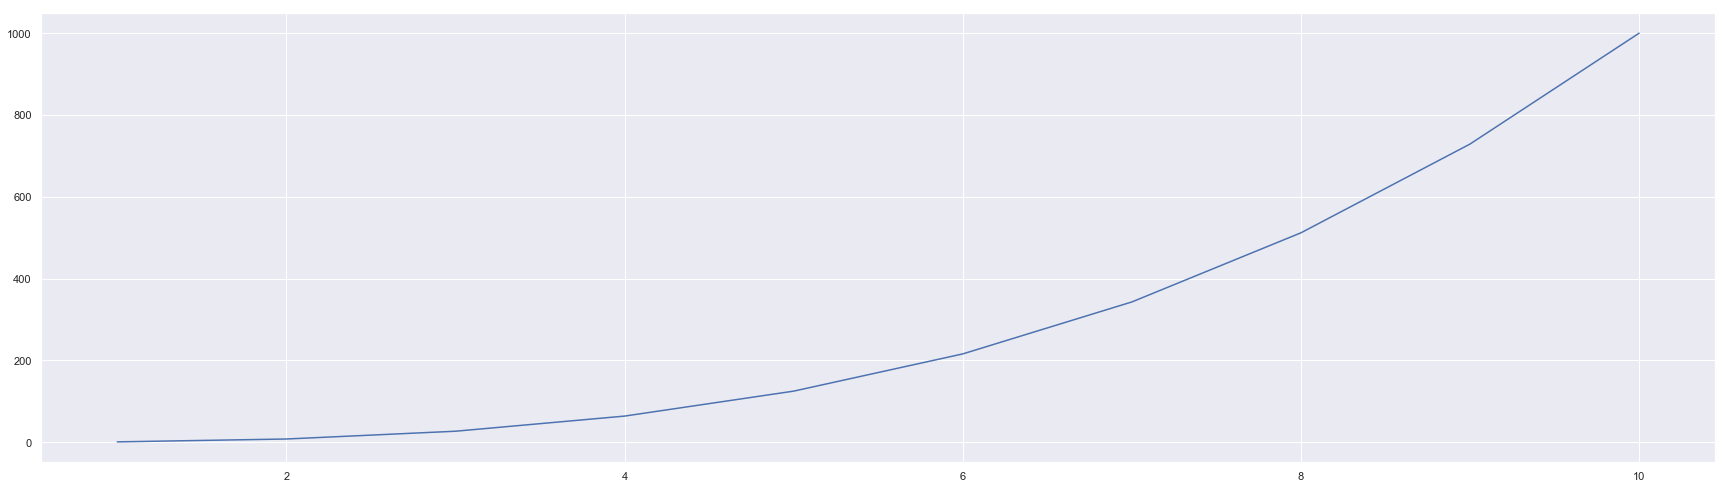

In [394]:
def PlotPower (start, stop, b):
    x = [i for i in range(start,stop+1)]
    y = [i ** 3 for i in x]
    return plt.plot(x,y)

PlotPower(1,10,3)

### Ejercicio 13 

<Font color = 'blue'>Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings. <Font>

Importando el dataset

In [396]:

df = pd.read_csv("datasets\Boston.csv")
df = df.iloc[:,1:]
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Volviendo la variable 1 o 0, dependiendo si la tasa de crimenes es mayor o menor que la media y graficando.

In [397]:
mean_crime = df["crim"].mean()
df['crim_rate'] = df['crim'].apply(lambda x: 1 if x > mean_crime else 0)
#eliminando la variable crim, y graficando
df = df.iloc[:,1:15]

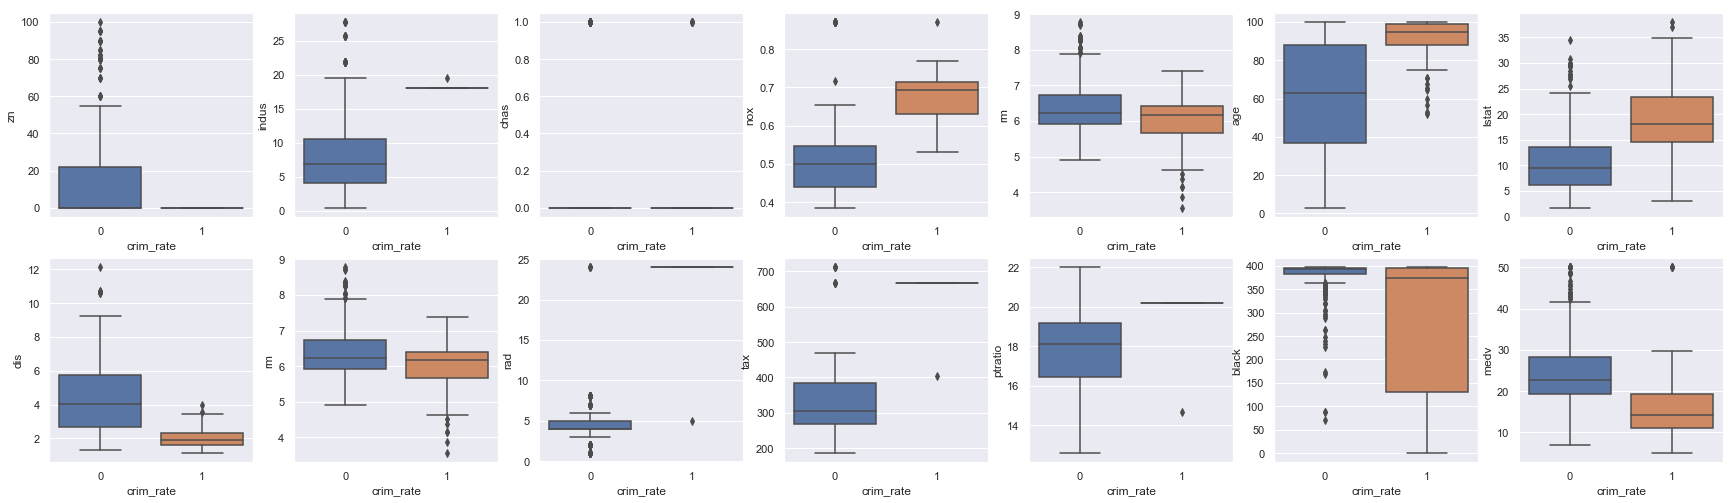

In [398]:
fig, axs = plt.subplots(2,7)
sb.set(rc={'figure.figsize':(30,15)})
sb.boxplot(x = df['crim_rate'], y=df['zn'],
                    data=df, ax=axs[0,0])
sb.boxplot(x = df['crim_rate'], y=df['indus'],
                    data=df, ax=axs[0,1])
sb.boxplot(x = df['crim_rate'], y=df['chas'],
                    data=df,ax=axs[0,2])
sb.boxplot(x = df['crim_rate'], y=df['nox'],
                    data=df, ax=axs[0,3])
sb.boxplot(x = df['crim_rate'], y=df['rm'],
                    data=df, ax=axs[0,4])
sb.boxplot(x = df['crim_rate'], y=df['age'],
                    data=df, ax=axs[0,5])
sb.boxplot(x = df['crim_rate'], y=df['dis'],
                    data=df, ax=axs[1,0])
sb.boxplot(x = df['crim_rate'], y=df['rm'],
                    data=df, ax=axs[1,1])
sb.boxplot(x = df['crim_rate'], y=df['rad'],
                    data=df, ax=axs[1,2])
sb.boxplot(x = df['crim_rate'], y=df['tax'],
                    data=df, ax=axs[1,3])
sb.boxplot(x = df['crim_rate'], y=df['ptratio'],
                    data=df, ax=axs[1,4])
sb.boxplot(x = df['crim_rate'], y=df['black'],
                    data=df, ax=axs[1,5])
sb.boxplot(x = df['crim_rate'], y=df['lstat'],
                    data=df, ax=axs[0,6])
sb.boxplot(x = df['crim_rate'], y=df['medv'],
                    data=df, ax=axs[1,6])

De los boxplot podemos notar que:
* hay ciertas variables que parecen incidir en la respuesta pues se ven algo diferenciadas a nivel de escalas, estas variables son: nox, age, lstat, dis, mendv
* Los datos están en diversas escalas.
* Hay datos que tienen mucha desviacion estandar. 
* Muchos de esos datos parecen no seguir una distribución normal. 

Escalamos las variables para evitar problemas de ajuste por escala

In [399]:
X = df.iloc[:,1:len(df.columns)-1]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head(4)
Y = df.loc[:,"crim_rate"]

Hacemos un analisis de las variables y su peso representativo para definir la variable respuesta. 

In [400]:
Bests = SelectKBest(score_func = f_classif , k=len(X.columns)).fit(X, Y)
Best = dict(zip(X.columns, Bests.pvalues_))
Best

{'indus': 3.245819136040563e-49,
 'chas': 0.45599075855167737,
 'nox': 3.9398798363572435e-53,
 'rm': 6.522357369508661e-08,
 'age': 9.10846288905772e-29,
 'dis': 2.6965139208958024e-32,
 'rad': 1.776005093336472e-272,
 'tax': 2.3658279631928736e-168,
 'ptratio': 1.4031521765486525e-27,
 'black': 6.797209761909621e-27,
 'lstat': 2.8701854886124156e-35,
 'medv': 5.533673314316687e-21}

Teniendo en cuenta el valor P de las predictoras podemos decir que las mejores que mejor estiman la variable respuesta son: 
* indus, nox, rad, tax, lstat, dis

Filtrando las variables que tenemos y particionando los datos.

In [401]:
X = X.loc[:,['indus', 'rad', 'tax', 'lstat', 'dis']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

**Regresión Logistica**

In [402]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       305
           1       0.96      0.99      0.98       100

    accuracy                           0.99       405
   macro avg       0.98      0.99      0.98       405
weighted avg       0.99      0.99      0.99       405



**LDA**

In [78]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       305
           1       0.96      0.99      0.98       100

   micro avg       0.99      0.99      0.99       405
   macro avg       0.98      0.99      0.98       405
weighted avg       0.99      0.99      0.99       405



**KNN**

In [403]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       305
           1       0.96      0.99      0.98       100

    accuracy                           0.99       405
   macro avg       0.98      0.99      0.98       405
weighted avg       0.99      0.99      0.99       405



Para el modelo se tiene que:

* Si nos fijamos en el F1-Score, podemos decir que los 3 algoritmos son capaces de clasificar muy bien cuando un suburbio superará cierta tasa (en este caso la media) de los crimenes.

* los 3 algoritmos son capaces de predecir con una precisión del 99% cuando un barrio no superará esa tasa, pero tambien es capaz de predecir con un 98% de precisión cuando si lo hará


## Punto 8.4 

### Ejercicio 7 

<Font color = 'blue'>In the lab, we applied random forests to the Boston data using mtry=6
and using ntree=25 and ntree=500. Create a plot displaying the test
error resulting from random forests on this data set for a more comprehensive
range of values for mtry and ntree. You can model your
plot after Figure 8.10. Describe the results obtained.<Font>

Importamos la base de datos

In [407]:
df = pd.read_csv("datasets\Boston.csv")
df = df.iloc[:,1:]
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Preprocesamos los datos

In [408]:
mean_crime = df["crim"].mean()
df['crim_rate'] = df['crim'].apply(lambda x: 1 if x > mean_crime else 0)
#eliminando la variable crim, y graficando
df = df.iloc[:,1:15]
#Escalamos los datos 
X = df.iloc[:,1:len(df.columns)-1]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head(4)
Y = df.loc[:,"crim_rate"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

Obtenemos el error basado en las cantidad de arboles y la cantidad de features

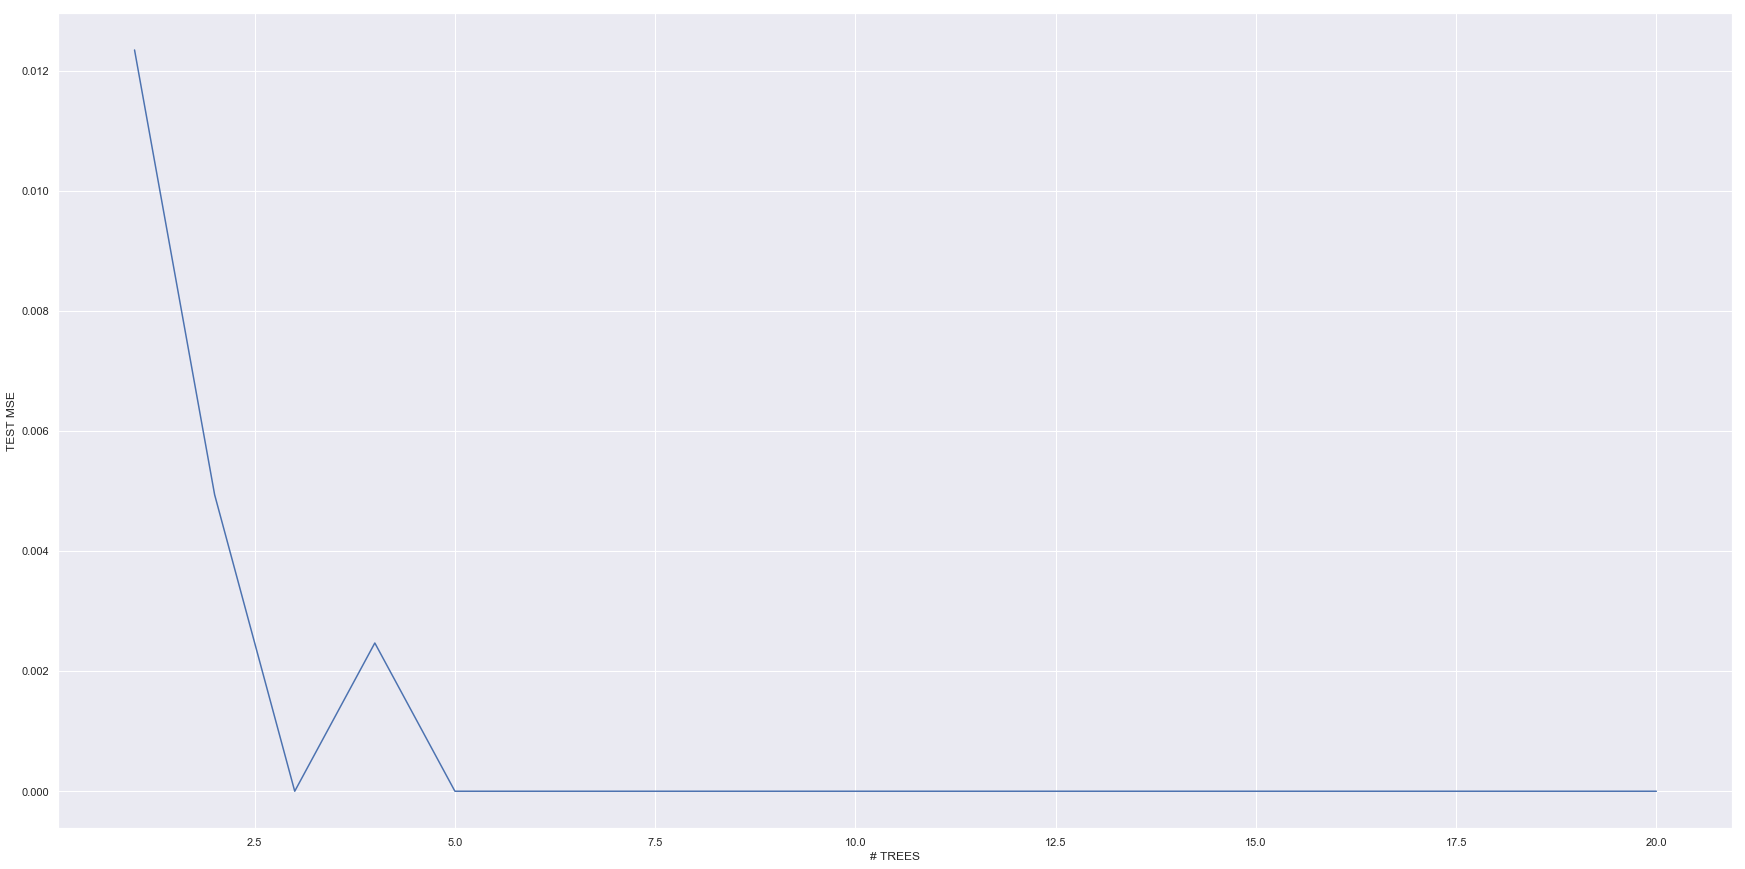

In [421]:
#En python mtry es max_features y ntree es n_estimators
n_estimators = 20
forest = RandomForestClassifier(warm_start=True, oob_score=True, max_features = int(12/2))
errors = []


for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(X, Y)
    y_pred = forest.predict(X_test)
    errors.append((i, mean_squared_error(y_test,y_pred)))

    
df_errors = pd.DataFrame(errors, columns = ['# TREES','TEST MSE'])
sb.lineplot(x = '# TREES', y= 'TEST MSE', data =df_errors)

Podemos observar que para un numero pequeño de arboles el error es muy grande, y que aunque en 3 arboles el error es minimo este vuelve a aumentar, lo que implaría un minimo local. Para 5 o mas arboles se puede decir que el error de validacion se estabiliza. 

### Ejercicio 8

<Font color = 'blue'>In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.<Font>

In [467]:
df = pd.read_csv("datasets\Carseats.csv")
df = df.iloc[:,1:]
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [527]:
#Codificando las variables categoricas
labelencoder = LabelEncoder()
df["ShelveLoc"] = labelencoder.fit_transform(df['ShelveLoc'])
df["Urban"] = labelencoder.fit_transform(df['Urban'])
df["US"] = labelencoder.fit_transform(df['US'])
df.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1


Escalando los datos y diviendolos en entrenamiento y validacion

<Font color = 'blue'>(a) Split the data set into a training set and a test set.<Font>

In [528]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

<Font color = 'blue'>(b) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?<Font>

In [512]:
model =  DecisionTreeRegressor(random_state=0, max_leaf_nodes = 8)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("TEST MSE: ")
mean_squared_error(y_test, y_predicted)

TEST MSE: 


5.716838750235472

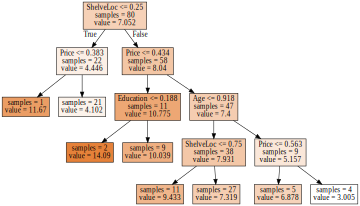

In [513]:
graph = tree.export_graphviz(model, feature_names=X.columns, impurity=False, filled=True)
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"5,5!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

Con el arbol el MSE obtenido es de: 5.71

Al entrenar el modelo y validarlo se puede obtener que este obtiene el minimo MSE cuando la complejidad es 7. Además podemos observar que para el modelo de 13 variables se tiene que para 7 se obtiene el minimo error, entonces se podria decir que podando el arbol este error se reduce.

<Font color = 'blue'>(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?<Font>

Usando **Cross Validation** para determinar el nivel optimo de complejidad del arbol

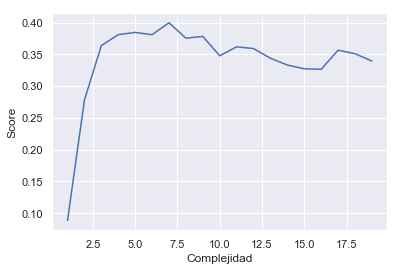

In [519]:
depth = []
for i in range(1,20):
    clf = tree.DecisionTreeRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=Y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))

df_cross = pd.DataFrame(depth, columns =["Complejidad", "Score"])
sb.lineplot(x = 'Complejidad', y= 'Score', data =df_cross) 

Al graficar la complejidad del arbol con respecto al score nos damos cuenta que el optimo del arbol está en 7, por lo tanto, se podría decir, que en este caso podar el arbol si mejora la precisión de la predicción y por lo tanto el MSE.

<Font color = 'blue'>(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine
which variables are most important.<Font>

Haciendo un **bagging** (es decir, que todas las predictoras sean consideradas en cada particion del arbol)

In [523]:
forest = RandomForestRegressor(warm_start=True, oob_score=True, max_features = 10)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("TEST MSE")
mean_squared_error(y_test, y_pred)

TEST MSE


3.046693878249999

Considerando todas las variables en cada split del arbol se tiene un **MSE** de 3.03 
Obteniendo la importancia de las variables:

In [522]:
importance = dict(zip(X_test.columns,forest.feature_importances_))
importance

{'CompPrice': 0.060832327118685366,
 'Income': 0.046810963158869325,
 'Advertising': 0.06740473879041295,
 'Population': 0.044631815271428434,
 'Price': 0.35012686029074575,
 'ShelveLoc': 0.29254568326788516,
 'Age': 0.08143955471327327,
 'Education': 0.03252474927276092,
 'Urban': 0.006117281186113397,
 'US': 0.017566026929825503}

Obtenemos que las variables mas importantes para la regresion del random forest son: **Price**, **ShelveLoc**


<Font color = 'blue'>(e) Use random forests to analyze this data. What test MSE do you
obtain? Use the importance() function to determine which variables
aremost important. Describe the effect of m, the number of
variables considered at each split, on the error rate
obtained.<Font>

Obteniendo el cambio del mse con respecto al numero de variables de importancia obtenidas del punto anterio

TEST MSE 3.2093 

Importancia de las variables: 



{'CompPrice': 0.06835279905719441,
 'Income': 0.05038907704962679,
 'Advertising': 0.07356305257766291,
 'Population': 0.0412714389999253,
 'Price': 0.327602665535002,
 'ShelveLoc': 0.2991678922527648,
 'Age': 0.08754690953346345,
 'Education': 0.02889886015420775,
 'Urban': 0.007182963809555306,
 'US': 0.016024341030597432}

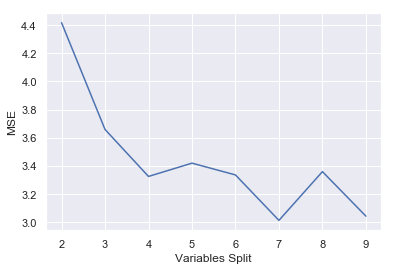

In [537]:
clf = RandomForestRegressor(max_features = 6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("TEST MSE %0.4f \n" % mean_squared_error(y_test, y_pred))


lista = []
for i in range(2,10):
    clf = RandomForestRegressor(max_features = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append((i, mean_squared_error(y_test, y_pred)))

df_cross = pd.DataFrame(lista, columns =["Variables Split", "MSE"])
sb.lineplot(x = 'Variables Split', y= 'MSE', data =df_cross) 

print("Importancia de las variables: \n")
importance = dict(zip(X_test.columns,clf.feature_importances_))
importance

Podemos observar que el error que obtenemos al entrenar el arbol con un m=6 es de 3.2. Observando la importancia de las variables tenemos que las variables que son mas determinantes para la regresion son: **Price** y **ShelveLoc**. Por otro lado analizando con diferentes m, tenemos que el menor MSE se obtiene para cuando m = 7. 

### Ejercicio 9

<Font color = 'blue'>This problem involves the OJ data set which is part of the ISLR
package.<Font>

In [547]:
df = pd.read_csv("datasets\OJ.csv")
df = df.iloc[:,1:]
df.head(2)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.0,0.0,0,0,0.5,1.99,1.75,0.24,No,0.000000,0.0,0.24,1
1,CH,239,1,1.75,1.99,0.0,0.3,0,1,0.6,1.69,1.75,-0.06,No,0.150754,0.0,0.24,1


In [548]:
#CODIFICAMOS LAS VARIABLES DE TIPO FACTOR
labelencoder = LabelEncoder()
df['Purchase'] = labelencoder.fit_transform(df['Purchase'])
df["Store7"] = labelencoder.fit_transform(df['Store7'])

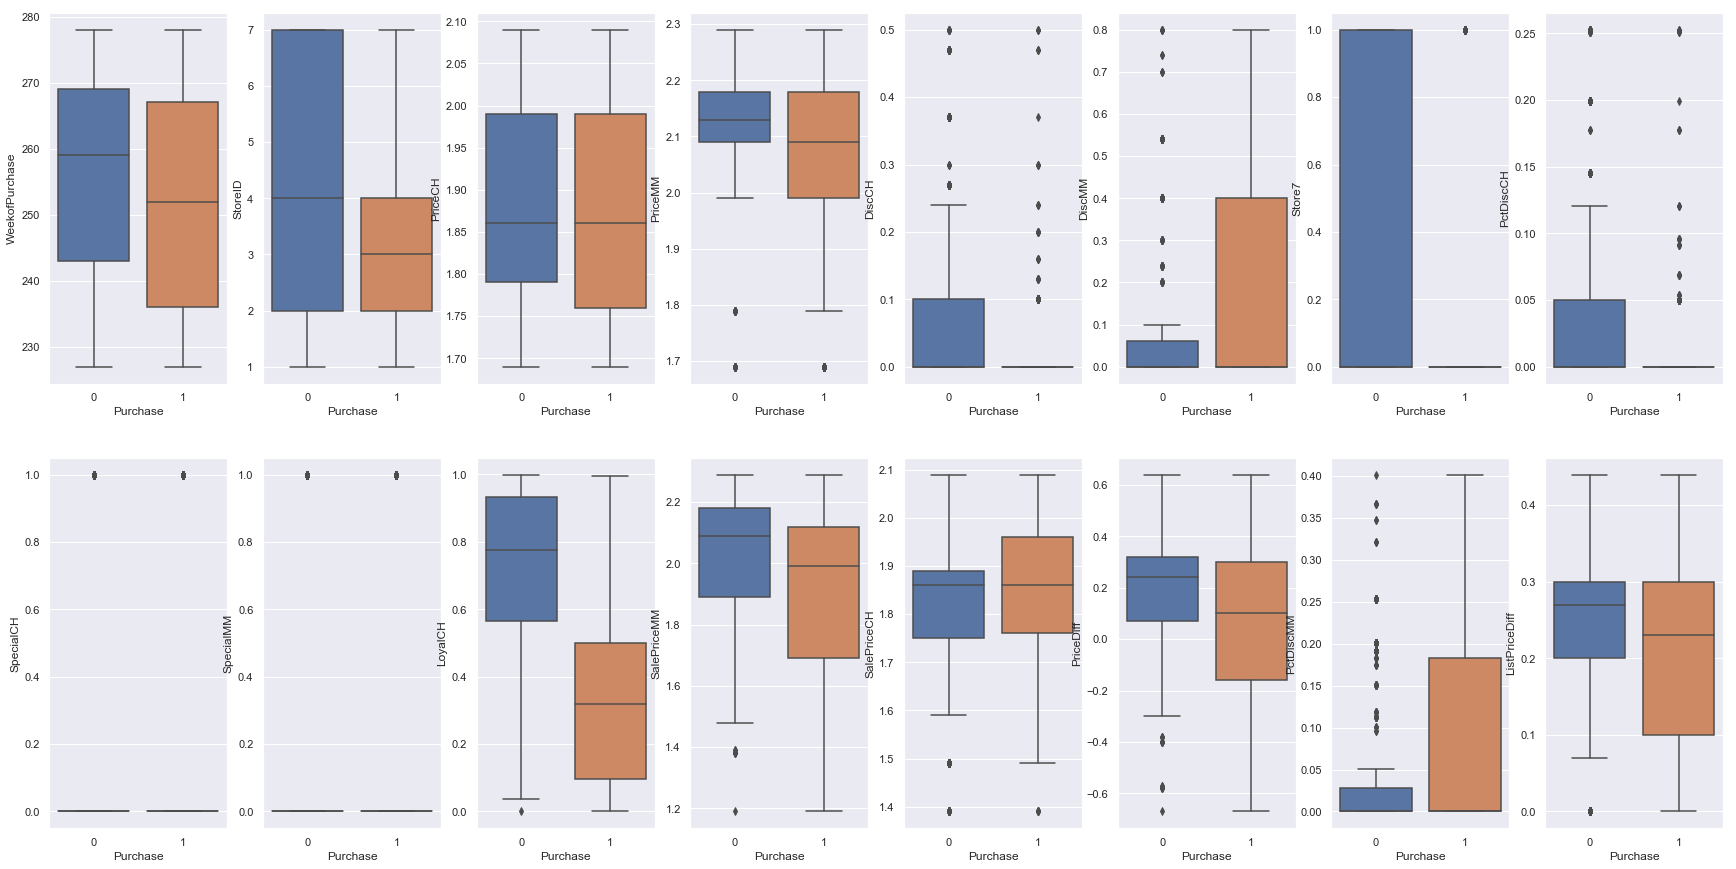

In [550]:
fig, axs = plt.subplots(2,8)
sb.set(rc={'figure.figsize':(30,15)})
sb.boxplot(x = df['Purchase'], y=df['WeekofPurchase'],
                    data=df, ax=axs[0,0])
sb.boxplot(x = df['Purchase'], y=df['StoreID'],
                    data=df, ax=axs[0,1])
sb.boxplot(x = df['Purchase'], y=df['PriceCH'],
                    data=df,ax=axs[0,2])
sb.boxplot(x = df['Purchase'], y=df['PriceMM'],
                    data=df, ax=axs[0,3])
sb.boxplot(x = df['Purchase'], y=df['DiscCH'],
                    data=df, ax=axs[0,4])
sb.boxplot(x = df['Purchase'], y=df['DiscMM'],
                    data=df, ax=axs[0,5])
sb.boxplot(x = df['Purchase'], y=df['SpecialCH'],
                    data=df, ax=axs[1,0])
sb.boxplot(x = df['Purchase'], y=df['SpecialMM'],
                    data=df, ax=axs[1,1])
sb.boxplot(x = df['Purchase'], y=df['LoyalCH'],
                    data=df, ax=axs[1,2])
sb.boxplot(x = df['Purchase'], y=df['SalePriceMM'],
                    data=df, ax=axs[1,3])
sb.boxplot(x = df['Purchase'], y=df['SalePriceCH'],
                    data=df, ax=axs[1,4])
sb.boxplot(x = df['Purchase'], y=df['PriceDiff'],
                    data=df, ax=axs[1,5])
sb.boxplot(x = df['Purchase'], y=df['Store7'],
                    data=df, ax=axs[0,6])
sb.boxplot(x = df['Purchase'], y=df['PctDiscMM'],
                    data=df, ax=axs[1,6])
sb.boxplot(x = df['Purchase'], y=df['PctDiscCH'],
                    data=df, ax=axs[0,7])
sb.boxplot(x = df['Purchase'], y=df['ListPriceDiff'],
                    data=df, ax=axs[1,7])

Observando los diagramas podemos observar que: 
* La variable LoyalCH parece ser una de las variables mas relacionadas con la variable respuesta teniendo en cuenta que se nota una diferencia de la media de esta variable con respecto a la variable respuesta. 
* Las variables están en diferentes escalas. 
* Se puede notar que el PriceCH tambien parece tener cierta influencia sobre la variable respuesta.

<Font color = 'blue'>(a) Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.<Font>

Se toma una muestra aleatoria del 75% equivalente a 800 muestras

In [551]:
Y = df.iloc[:,0]
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.26, random_state=0)

<Font color = 'blue'>(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?<Font>

In [582]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Obteniendo la tasa de error de entrenamiento

In [583]:
y_pred = clf.predict(X_train)

print("TRAINING MSE:")
print(mean_squared_error(y_train, y_pred))

TRAINING MSE:
0.008849557522123894


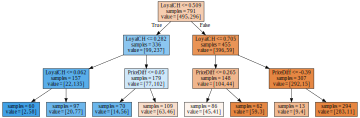

In [561]:
graph = tree.export_graphviz(clf, feature_names=X.columns, impurity=False, filled=True)
pydot_graph = pydotplus.graph_from_dot_data(graph)
pydot_graph.set_size('"5,5!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

Podemos observar que el error de entrenamiento es de **TRAINING MSE 0.17** con **8 nodos** terminales

<Font color = 'blue'>(c) Type in the name of the tree object in order to get a detailed
text output. Pick one of the terminal nodes, and interpret the
information displayed.<Font>

Podemos observar del arbol que el nodo mas hacia la derecha, ha clasificado 294 muestras las cuales ha dividio entre 283 y 11. correspondiente a una decisión o a otra para clasificar.

<Font color = 'blue'>(d) Create a plot of the tree, and interpret the results<Font>

El grafico fue creado en el literal C. y las conclusiones tambien fueron dadas.

<Font color = 'blue'>(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?<Font>


In [569]:
y_pred = clf.predict(X_test)

print("TRAINING MSE:")
print(mean_squared_error(y_test, y_pred))

print("Reporte de clasificacion")
print(classification_report(y_test,y_pred))

TRAINING MSE:
0.1863799283154122
Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       158
           1       0.85      0.69      0.76       121

    accuracy                           0.81       279
   macro avg       0.82      0.80      0.80       279
weighted avg       0.82      0.81      0.81       279



Se puede observar que el error de clasificacion es de 0.18, Pero mas detalladamente podemos observar que el clasificador es capaz de predecir el **0 con un error de 0.15** y el **1 con un error de 0.24**

<Font color = 'blue'>(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.<Font>

<Font color = 'blue'>(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.<Font>


<Font color = 'blue'>(h) Which tree size corresponds to the lowest cross-validated classification
error rate?<Font>



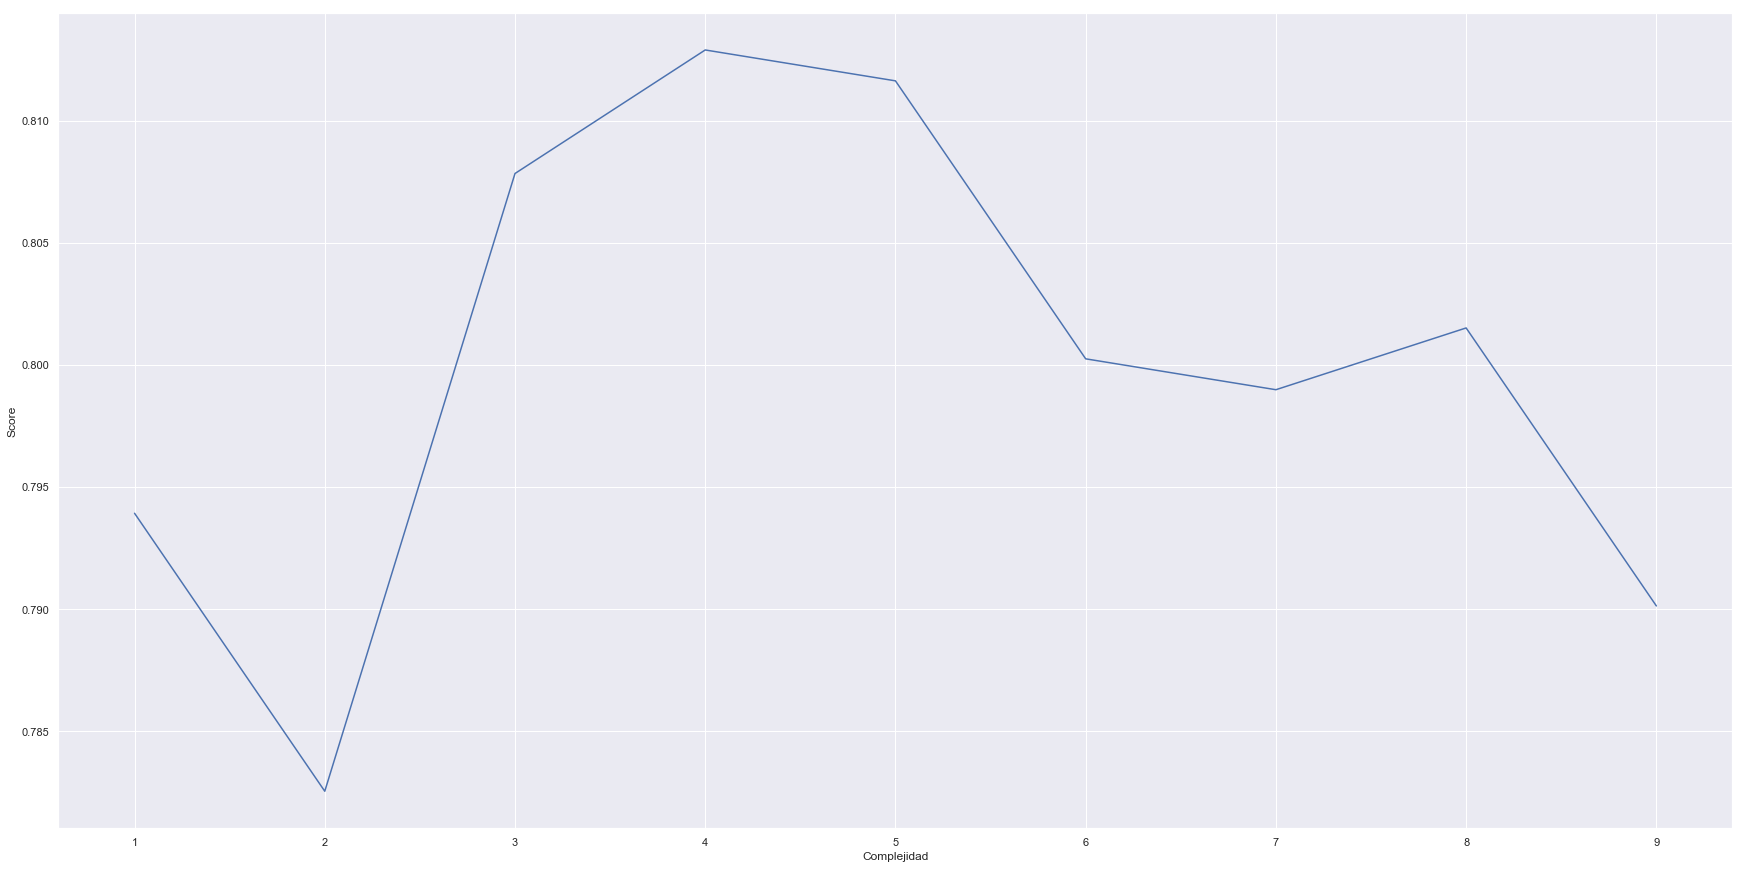

In [574]:
depth = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))

df_cross = pd.DataFrame(depth, columns =["Complejidad", "Score"])
sb.lineplot(x = 'Complejidad', y= 'Score', data =df_cross)

Para responder la tres anteriores preguntas podemos determinar que para un arbol de tamaño 4 el score es el mejor, por ende el error es el menor, sobre el conjunto de entrenamiento

<Font color = 'blue'>(i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.<Font>

In [585]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

clf_unpruned = DecisionTreeClassifier()
clf_unpruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

<Font color = 'blue'>(j) Compare the training error rates between the pruned and unpruned
trees. Which is higher?.<Font>

In [589]:
y_pred = clf.predict(X_train)
print("TRAINING PRUNED TREE MSE:")
print(mean_squared_error(y_train, y_pred))

y_pred = clf_unpruned.predict(X_train)
print("TRAINING UNPRUNED TREE MSE:")
print(mean_squared_error(y_train, y_pred))

TRAINING PRUNED TREE MSE:
0.1554993678887484
TRAINING UNPRUNED TREE MSE:
0.008849557522123894


Podemos observar que en el arbol no podado el error de entrenamiento es menor que en el arbol que no lo está. 

<Font color = 'blue'>(k) Compare the test error rates between the pruned and unpruned
trees. Which is higher?<Font>

In [590]:
y_pred = clf.predict(X_test)
print("TEST PRUNED TREE MSE:")
print(mean_squared_error(y_test, y_pred))

y_pred = clf_unpruned.predict(X_test)
print("TEST UNPRUNED TREE MSE:")
print(mean_squared_error(y_test, y_pred))

TEST PRUNED TREE MSE:
0.2222222222222222
TEST UNPRUNED TREE MSE:
0.24731182795698925


Podemos observar que en el arbol podado el error de validación es menor que en el no podado. por lo tanto podriamos concluir que podar un arbol puede prevenir problemas de sobreajuste.

### Ejercicio 10 

In [187]:
df = pd.read_csv("datasets\Hitters.csv")
df = df.iloc[:,1:]
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


<font color='blue'> (a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.<font>

 Eliminando las observaciones Nulas y transformando la variable respuesta Salario a lognormal

In [188]:
df = df.dropna()
df['Salario'] = np.log(df['Salary'])
df = df.drop('Salary', 1)
df['League'] = labelencoder.fit_transform(df['League'])
df["NewLeague"] = labelencoder.fit_transform(df['NewLeague'])
df["Division"] = labelencoder.fit_transform(df['Division'])

<font color='blue'> (b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.<font>

In [189]:
Train = df.iloc[0:200] 
Test = df.iloc[201:]
X_train = Train.iloc[:,0:19]
Y_train = Train.iloc[:,19]
X_test = Test.iloc[:,0:19]
Y_test = Test.iloc[:,19]

<font color='blue'>C.) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis. </font>

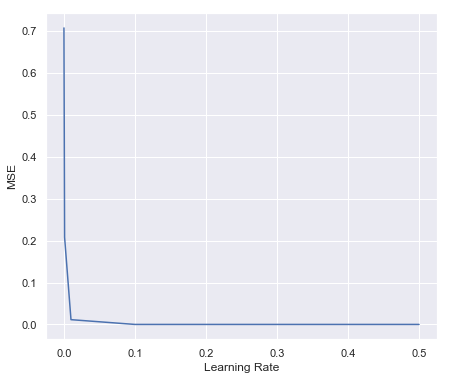

In [194]:
lr_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
lista = []

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=learning_rate)
    gb_clf.fit(X_train, Y_train)
    y_pred = gb_clf.predict(X_train)
    MSE = mean_squared_error(Y_train, y_pred)
    lista.append((learning_rate, MSE))
    
df_cross = pd.DataFrame(lista, columns =["Learning Rate", "MSE"])
sb.set(rc={'figure.figsize':(7,6)})
sb.lineplot(x="Learning Rate", y="MSE", data=df_cross)

Podemos observar que el error de entrenamiento se reduce casi a cero con una tasa de aprendizaje muy baja. 

<font color='blue'> D. Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis. </font>

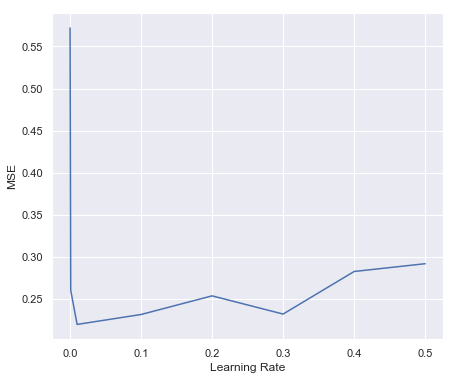

In [193]:
lr_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
lista = []

for learning_rate in lr_list:
    gb_clf = GradientBoostingRegressor(n_estimators=1000, learning_rate=learning_rate)
    gb_clf.fit(X_train, Y_train)
    y_pred = gb_clf.predict(X_test)
    MSE = mean_squared_error(Y_test, y_pred)
    lista.append((learning_rate, MSE))
    
df_cross = pd.DataFrame(lista, columns =["Learning Rate", "MSE"])
sb.set(rc={'figure.figsize':(7,6)})
sb.lineplot(x="Learning Rate", y="MSE", data=df_cross)

In [142]:
lista

[(0.0001, 0.5720295842302242),
 (0.001, 0.2605696514160957),
 (0.01, 0.22160368691250415),
 (0.1, 0.23579890043055485),
 (0.2, 0.2520871021439828),
 (0.3, 0.2223698521508051),
 (0.4, 0.28944365997216687),
 (0.5, 0.2964980506414013)]

Podemos observar que el minimo error de prueba es para un learning rate de 0.01

<font color='blue'> e.) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.  <font>

Comparando el MSE del GB con respecto a RandomForest

In [144]:
gb_clf = RandomForestRegressor(max_features = 10)
gb_clf.fit(X_train, Y_train)
y_pred = gb_clf.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.22126042444698565

Con respecto a al MSE de validación se puede observar que no hay mucha diferencia entre GB y randomforest

Comparando el MSE de una regresión lineal con GB

In [147]:
gb_clf = LinearRegression()
gb_clf.fit(X_train, Y_train)
y_pred = gb_clf.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.46829206717274896

Con respecto al GB una regresión lineal tiene mayor MSE de validacion

<font color='blue'> f.) 
   Which variables appear to be the most important predictors in
the boosted model?<font>

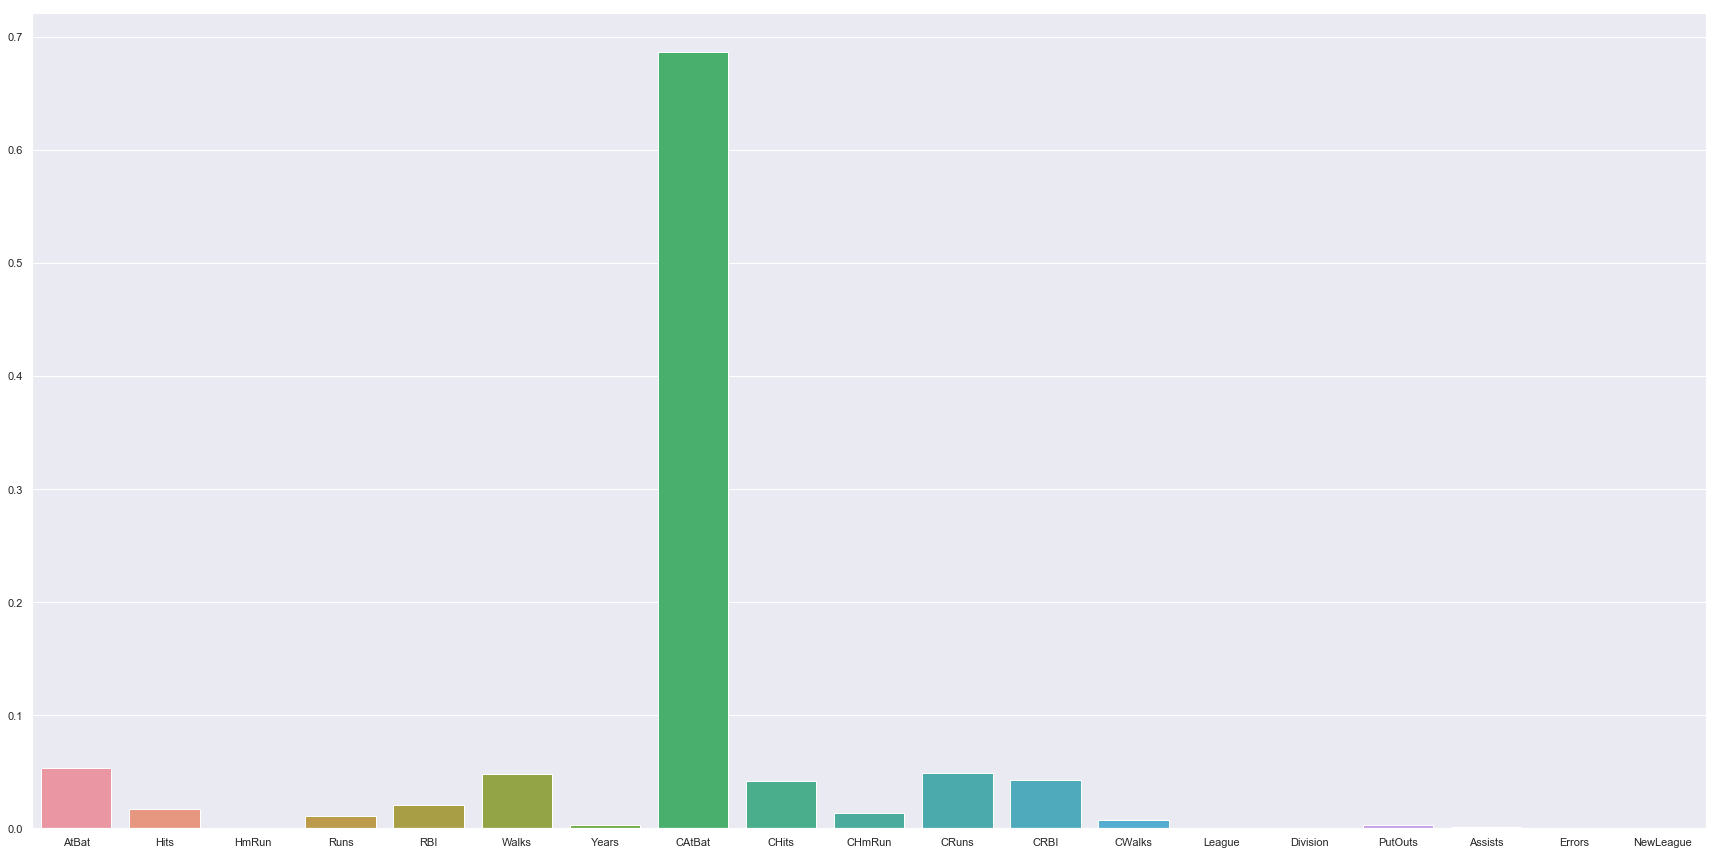

In [173]:
gb_clf = GradientBoostingRegressor(learning_rate=0.01)
gb_clf.fit(X_train, Y_train)
y_pred = gb_clf.predict(X_test)
D = dict(zip(X_test.columns, gb_clf.feature_importances_))
x = [key for key in D.keys()]
y = [value for value in D.values()]
sb.set(rc={'figure.figsize':(30,15)})
sb.barplot(x,y)

La variable que es mas importante para el modelo es: **CATBat**

<font color='blue'> g.) Now apply bagging to the training set. What is the test set MSE for this approach ? <font>


Para hacer bagging el numero maximo de predictoras usadas en el entrenamiento debe ser igual al total de predictoras

In [174]:
gb_clf = GradientBoostingRegressor(max_features = 19 , learning_rate=learning_rate)
gb_clf.fit(X_train, Y_train)
y_pred = gb_clf.predict(X_train)
mean_squared_error(Y_train, y_pred)

5.44333223035097e-06

Haciendo bagging podemos obtener que el MSE de entrenamiento es muy bajo

### Ejercicio 11

<font color='blue'> This question uses the Caravan data set. <font>

Importando el Dataset Caravan

In [204]:
df = pd.read_csv("datasets\Caravan.csv")
df = df.iloc[:,1:]
df.head(2)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No


<font color='blue'>a.) Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.<font>

Creando un data set partiendo los datos en 1000 para entrenamiento y el resto para pruebas

In [205]:
Train = df.iloc[0:1000] 
Test = df.iloc[1001:]

<font color='blue'>b.) Fit a boosting model to the training set with Purchase as the
response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be
the most important?<font>

In [209]:
X_train = Train.iloc[:,0:85]
Y_train = Train.iloc[:,-1]
X_test = Test.iloc[:,0:85]
Y_test = Test.iloc[:,-1]

clf = GradientBoostingClassifier(n_estimators = 1000, learning_rate  = 0.01)
clf.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [213]:
D = dict(zip(X_test.columns, clf.feature_importances_))
D

{'MOSTYPE': 0.06301424200531326,
 'MAANTHUI': 0.0007459590770310122,
 'MGEMOMV': 0.0030811049113894273,
 'MGEMLEEF': 0.0019165622304831782,
 'MOSHOOFD': 0.014221860590631937,
 'MGODRK': 0.006879559074550392,
 'MGODPR': 0.03576300417318777,
 'MGODOV': 0.004246532391473419,
 'MGODGE': 0.05331277480725839,
 'MRELGE': 0.01747367386151503,
 'MRELSA': 0.007191794339045778,
 'MRELOV': 0.010242683129851894,
 'MFALLEEN': 0.024555066655891914,
 'MFGEKIND': 0.012442871348348627,
 'MFWEKIND': 0.012384840934063883,
 'MOPLHOOG': 0.045093046839876166,
 'MOPLMIDD': 0.007409959653275468,
 'MOPLLAAG': 0.003019832283479399,
 'MBERHOOG': 0.0065318848853556,
 'MBERZELF': 0.00204566916256223,
 'MBERBOER': 0.0055487666539062,
 'MBERMIDD': 0.04245151906129177,
 'MBERARBG': 0.021622351765551093,
 'MBERARBO': 0.002059587340476553,
 'MSKA': 0.012717763867760603,
 'MSKB1': 0.021858857818713523,
 'MSKB2': 0.00405601419175928,
 'MSKC': 0.0057937815345750245,
 'MSKD': 0.00963437363054282,
 'MHHUUR': 0.00456020738305

Las variables que mas tienen importancia para el modelo son: **PAANHANG** , **PTRACTOR**

<font color='blue'>c.) Use the boosting model to predict the response on the test data.
Predict that a person will make a purchase if the estimated probability
of purchase is greater than 20 %. Form a confusion matrix.
What fraction of the people predicted to make a purchase
do in fact make one? How does this compare with the results
obtained from applying KNN or logistic regression to this data
set?<font>

In [211]:
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          No       0.94      0.99      0.97      4532
         Yes       0.25      0.06      0.09       289

    accuracy                           0.93      4821
   macro avg       0.60      0.52      0.53      4821
weighted avg       0.90      0.93      0.91      4821



### Ejercicio 12

<font color='blue'>Apply boosting, bagging, and random forests to a data set of your
choice. Be sure to fit the models on a training set and to evaluate their
performance on a test set. How accurate are the results compared
to simple methods like linear or logistic regression? Which of these
approaches yields the best performance?<font>

In [218]:
df = pd.read_csv("datasets\wage.csv")
df = df.iloc[:,1:12]
df.head(2)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273


In [221]:
labelencoder = LabelEncoder()
df["sex"] = labelencoder.fit_transform(df['sex'])
df["maritl"] = labelencoder.fit_transform(df['maritl'])
df["race"] = labelencoder.fit_transform(df['race'])
df["education"] = labelencoder.fit_transform(df['education'])
df["region"] = labelencoder.fit_transform(df['region'])
df["jobclass"] = labelencoder.fit_transform(df['jobclass'])
df["health"] = labelencoder.fit_transform(df['health'])
df["health_ins"] = labelencoder.fit_transform(df['health_ins'])

#Splitting data

X = df.iloc[:,0:9]
Y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=0)

Aplicando Bosting, Bagging y Random forest al conjunto de datos

**Boosting**

In [286]:
gb_clf = GradientBoostingRegressor(learning_rate= 0.017)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
MSE_BOOSTING = mean_squared_error(y_test, y_pred)

**Bagging**

In [232]:
gb_clf = GradientBoostingRegressor(max_features = 9)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
MSE_BAGGING = mean_squared_error(y_test, y_pred)

**Random Forest**

In [270]:
gb_clf =RandomForestRegressor(max_features = 4, ccp_alpha = 0.001)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_pred)

**linear Regression**

In [231]:
gb_clf = LinearRegression()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
MSE_LR = mean_squared_error(y_test, y_pred)

In [287]:
print("Boosting MSE: " + str(MSE_BOOSTING) + "\n" + 
     "Bagging MSE: " + str(MSE_BAGGING) + "\n" +
     "Random Forest MSE: " + str(MSE_RF) + "\n" +
     "linear Regression MSE: " + str(MSE_LR) + "\n")

Boosting MSE: 0.09116543514505748
Bagging MSE: 0.09585911489936189
Random Forest MSE: 0.08959638641617637
linear Regression MSE: 0.09402275498124815



Podemos concluir que el mejor algoritmo para este caso es **Random Forest** con Error de **0.089**, seguido de **Boosting** con un Eroor de **0.091**. Por otro lado Bagging y la regresión lineal mantienen casi el mismo porcentaje de error.